<a href="https://colab.research.google.com/github/munisdev86/course22/blob/master/sd_2dot1_hf_clone_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://huggingface.co/stabilityai/stable-diffusion-2-1

Cloning into 'stable-diffusion-2-1'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 81 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (81/81), done.
tcmalloc: large alloc 1471086592 bytes == 0x558e6dd34000 @  0x7f9179fe92a4 0x558e3099578f 0x558e309728db 0x558e309275b3 0x558e308cb34a 0x558e308cb806 0x558e308e8ad1 0x558e308e9069 0x558e308e9593 0x558e3098e482 0x558e3082ecc2 0x558e30815a75 0x558e30816735 0x558e3081573a 0x7f9179330c87 0x558e3081578a
tcmalloc: large alloc 1471086592 bytes == 0x558e6dd34000 @  0x7f9179fe92a4 0x558e3099578f 0x558e309728db 0x558e309275b3 0x558e308cb34a 0x558e308cb806 0x558e308e8ad1 0x558e308e9069 0x558e308e9593 0x558e3098e482 0x558e3082ecc2 0x558e30815a75 0x558e30816735 0x558e3081573a 0x7f9179330c87 0x558e3081578a
tcmalloc: large alloc 2206621696 bytes == 0x558ec5824000 @  0x7f9179fe92a4 0x558e3099578f 0x558e309728db 0x558e309275b3 0x558

In [5]:
!du -sh ./stable-diffusion-2-1/

20G	./stable-diffusion-2-1/


In [6]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-cep8vgfr
  Running command git clone -q https://github.com/huggingface/diffusers.git /tmp/pip-req-build-cep8vgfr
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 191 kB 74.6 MB/s 
     |████████████████████████████████| 33.8 MB 359 kB/s 
     |████████████████████████████████| 182 kB 72.9 MB/s 
     |████████████████████████████████| 7.6 MB 63.5 MB/s 
  Created wheel for diffusers: filename=diffusers-0.11.0.dev0-py3-none-any.whl size=513043 sha256=e2231c4a45eabdf93422a1f564ddaa80e46baf465c1ffbec44539dabf97e4175
  Stored in directory: /tmp/pip-ephem-wheel-cache-ukr8wj_r/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Success

In [7]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, PNDMScheduler
import torch

model_id = "/content/stable-diffusion-2-1"

# Use the Euler scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


  0%|          | 0/50 [00:00<?, ?it/s]

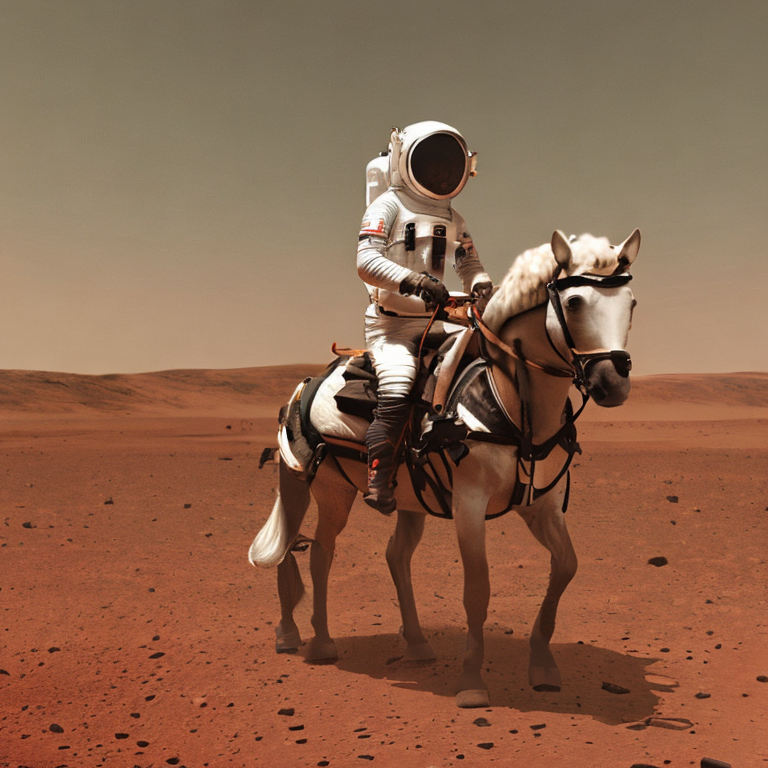

In [8]:
prompt = "a portrait of a dog"
prompt = "a photo of an astronaut riding a horse on mars"

result = pipe(prompt)
image = result.images[0]
    
# image.save("astronaut_rides_horse.png")
image